# Forecasting using Prophet

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
data = pd.read_csv('data/AirQualityUCI.csv',sep=';')

In [5]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null object
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null object
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null object
RH               9357 non-null object
AH               9357 non-null object
Unnamed: 15      0 non-null float64
Unnamed: 16      0 non-null float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [7]:
data.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,NaN,NaN
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,NaN,NaN
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,NaN,NaN
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,NaN,NaN
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,NaN,NaN


 We can see the -200 value in the data. since ,air quality index cannot be negative I will drop this value from the data.

In [8]:
data.shape

(9471, 17)

In [9]:
data.dropna(axis=1,how='all',inplace=True)
data.dropna(axis=0,how='all',inplace=True)

In [10]:
data.shape

(9357, 15)

In [11]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [13]:
data.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000


# Data preprocessing and cleaning

In [14]:
# converting date's into datetime format.
data['Date'] = pd.to_datetime(data['Date'])

In [15]:
for col in data.iloc[:,2:].columns:
    if data[col].dtypes == 'object':
        data[col] = data[col].str.replace(',','.').astype('float')   

In [16]:
def positive_avg(num):
    return(num[num>-200]).mean()

daily_data = data.drop('Time',axis=1).groupby('Date').apply(positive_avg)

In [17]:
daily_data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,
2004-01-04,2.550000,1244.380952,310.125,11.971429,1010.428571,161.304348,880.666667,96.739130,1644.380952,1155.857143,15.519048,51.133333,0.854881
2004-01-05,2.056522,1097.500000,275.000,8.662500,913.708333,104.739130,918.083333,84.956522,1640.416667,904.625000,20.150000,52.183333,1.167312
2004-01-06,2.100000,1135.583333,NaN,12.375000,1021.875000,152.043478,896.791667,75.869565,1881.500000,1066.958333,20.325000,66.154167,1.533350
2004-01-07,2.162500,1130.583333,NaN,12.225000,1038.541667,139.695652,740.916667,113.434783,1854.250000,1059.625000,30.450000,39.691667,1.624108
2004-01-08,0.983333,974.166667,NaN,5.808333,792.583333,51.739130,880.083333,58.521739,1559.000000,670.583333,30.654167,42.120833,1.673521


In [ ]:
# we can see the NaN in the dataset.So,we will filter the data that has more than 8 'NaN'.

In [18]:
daily_data.isna().sum() > 8

CO(GT)            True
PT08.S1(CO)      False
NMHC(GT)          True
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)           True
PT08.S3(NOx)     False
NO2(GT)           True
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

In [19]:
daily_data = daily_data.iloc[:,(daily_data.isna().sum()<= 8).values]

In [20]:
daily_data.head()

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,
2004-01-04,1244.380952,11.971429,1010.428571,880.666667,1644.380952,1155.857143,15.519048,51.133333,0.854881
2004-01-05,1097.500000,8.662500,913.708333,918.083333,1640.416667,904.625000,20.150000,52.183333,1.167312
2004-01-06,1135.583333,12.375000,1021.875000,896.791667,1881.500000,1066.958333,20.325000,66.154167,1.533350
2004-01-07,1130.583333,12.225000,1038.541667,740.916667,1854.250000,1059.625000,30.450000,39.691667,1.624108
2004-01-08,974.166667,5.808333,792.583333,880.083333,1559.000000,670.583333,30.654167,42.120833,1.673521


In [21]:
daily_data.shape

(391, 9)

In [23]:
daily_data = daily_data.dropna()

In [24]:
daily_data.shape

(383, 9)

In [25]:
weekly_data = daily_data.resample('W',).mean()

In [26]:
weekly_data.head()

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,
2004-01-04,1244.380952,11.971429,1010.428571,880.666667,1644.380952,1155.857143,15.519048,51.133333,0.854881
2004-01-11,1136.801760,11.674457,1009.344462,760.484990,1727.833075,1083.683747,24.564726,53.224017,1.526858
2004-01-18,1173.375000,13.429167,1050.458333,1490.333333,1448.541667,1196.333333,10.891667,77.000000,1.002796
2004-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
weekly_data.shape

(101, 9)

In [28]:
weekly_data = weekly_data.dropna()

In [29]:
weekly_data.shape

(73, 9)

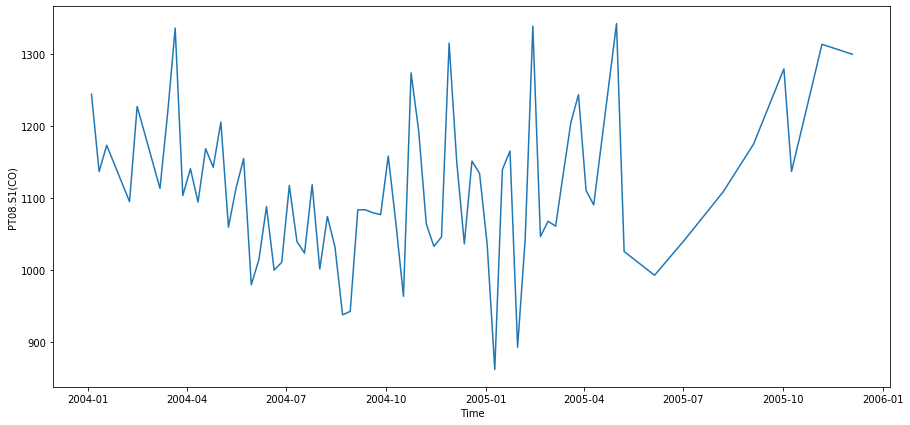

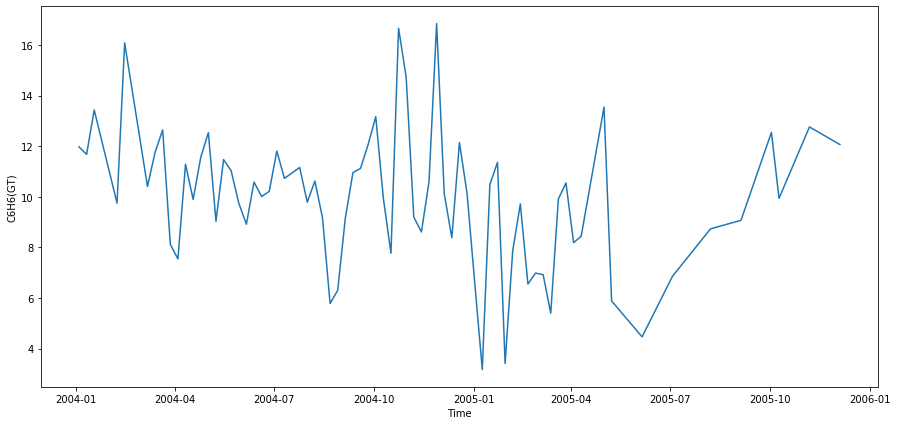

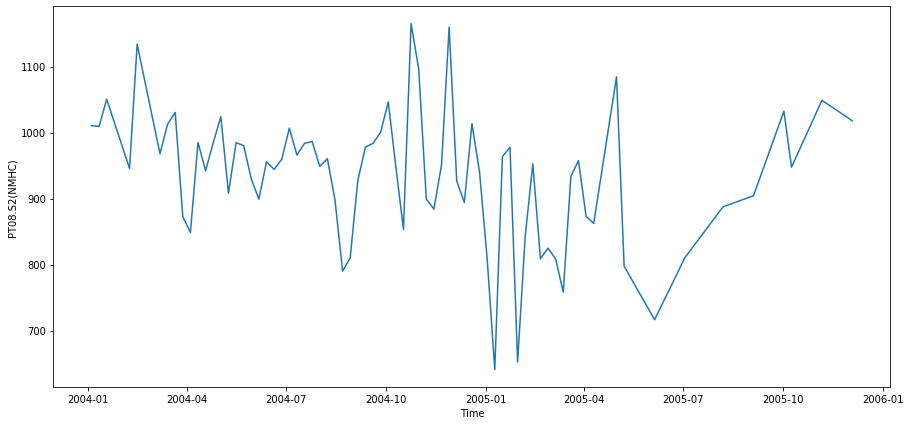

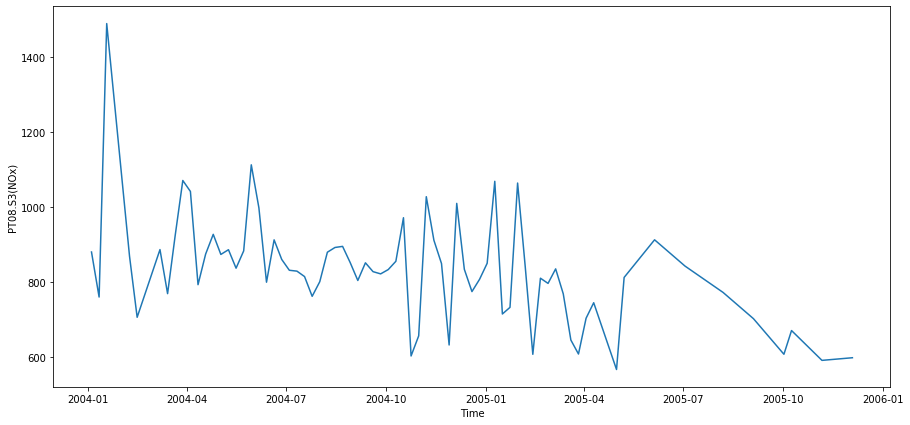

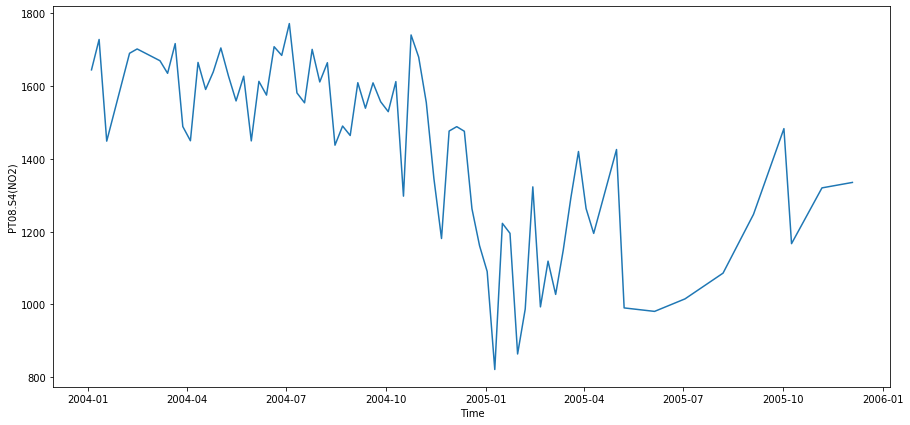

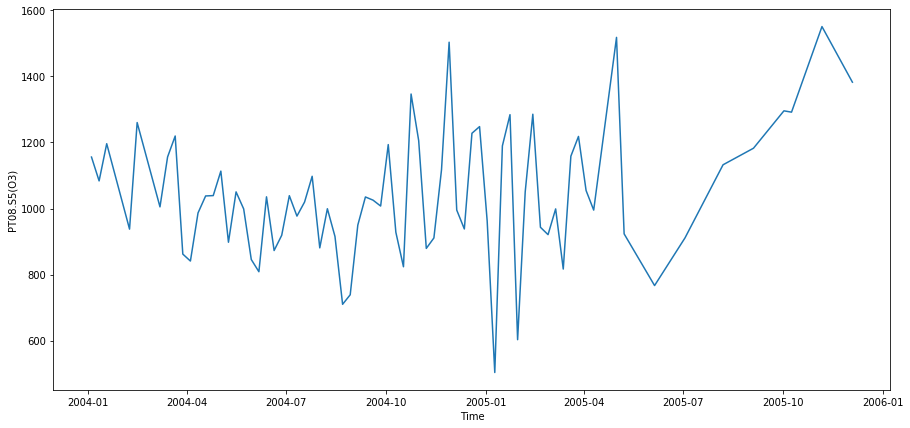

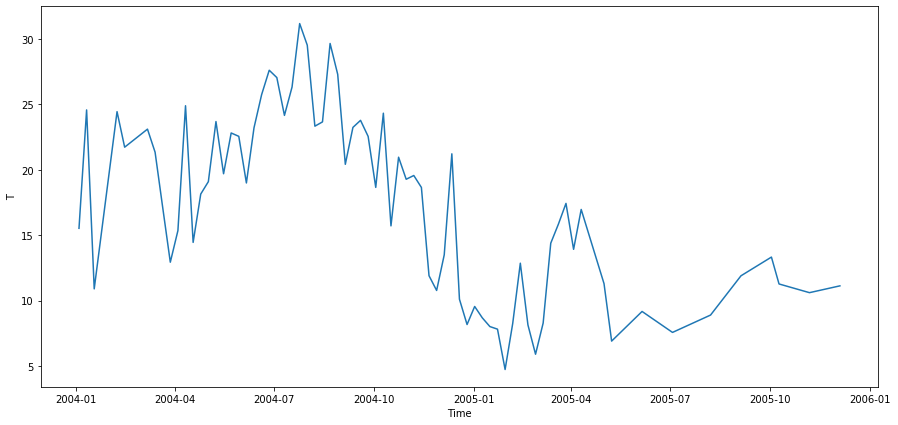

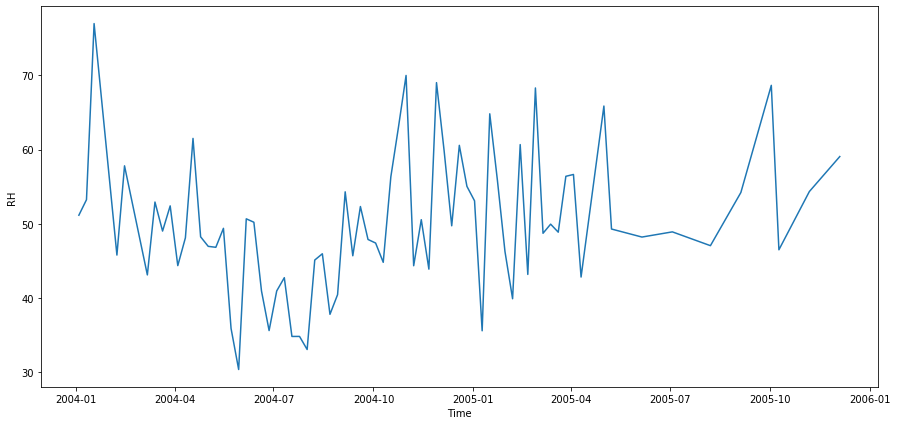

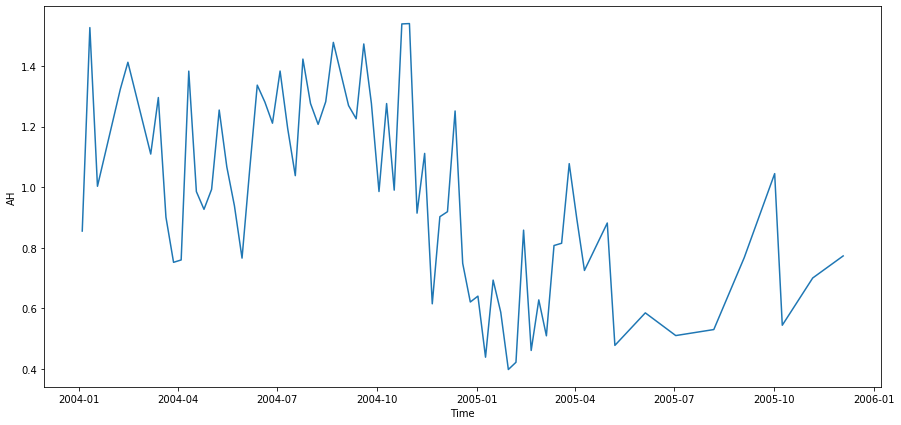

In [31]:
def plot_data(col):
    plt.figure(figsize=(15,7))
    plt.plot(weekly_data[col])
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.grid(False)
    plt.show()

for col in weekly_data.columns :
    plot_data(col)

# Modelling 
Lets focus on forecasting carbon monoxide .Carbon monoxide (CO), an odorless, colorless gas, which can cause sudden illness and death, is produced any time a fossil fuel is burned.

In [32]:
cols_to_drop = ['C6H6(GT)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH']
weekly_data = weekly_data.drop(cols_to_drop,axis=1)

In [33]:
weekly_data.head()

,PT08.S1(CO)
Date,
2004-01-04,1244.380952
2004-01-11,1136.801760
2004-01-18,1173.375000
2004-02-08,1095.033333
2004-02-15,1227.406250


In [35]:
from fbprophet import Prophet
import logging 

logging.getLogger().setLevel(logging.ERROR)

In [36]:
df = weekly_data.reset_index()
df.columns = ['ds','y']
df.head()

,ds,y
0,2004-01-04,1244.380952
1,2004-01-11,1136.801760
2,2004-01-18,1173.375000
3,2004-02-08,1095.033333
4,2004-02-15,1227.406250


In [37]:
prediction_size = 30 

train_df = df[:- prediction_size]

In [38]:
p = Prophet()
p.fit(train_df)

In [39]:
future = p.make_future_dataframe(periods=prediction_size)

forecast = p.predict(future)

In [40]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-01-04,1170.048048,1070.004578,1267.769979,1170.048048,1170.048048,0.0,0.0,0.0,0.0,0.0,0.0,1170.048048
1,2004-01-11,1167.096943,1067.671620,1266.002176,1167.096943,1167.096943,0.0,0.0,0.0,0.0,0.0,0.0,1167.096943
2,2004-01-18,1164.145837,1071.240408,1263.992038,1164.145837,1164.145837,0.0,0.0,0.0,0.0,0.0,0.0,1164.145837
3,2004-02-08,1155.292521,1049.700764,1259.904054,1155.292521,1155.292521,0.0,0.0,0.0,0.0,0.0,0.0,1155.292521
4,2004-02-15,1152.341416,1051.221264,1245.956263,1152.341416,1152.341416,0.0,0.0,0.0,0.0,0.0,0.0,1152.341416


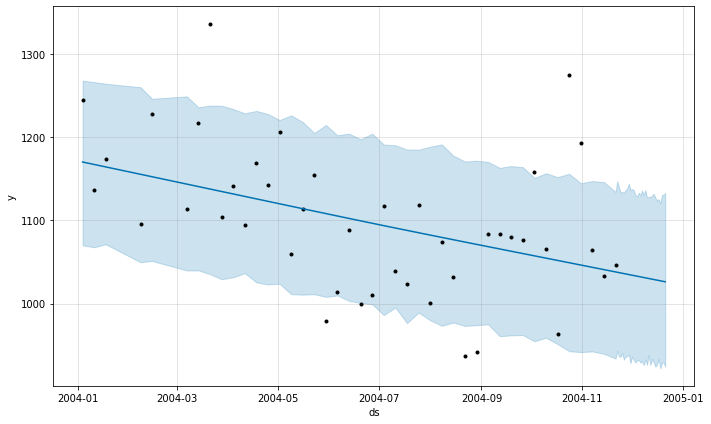

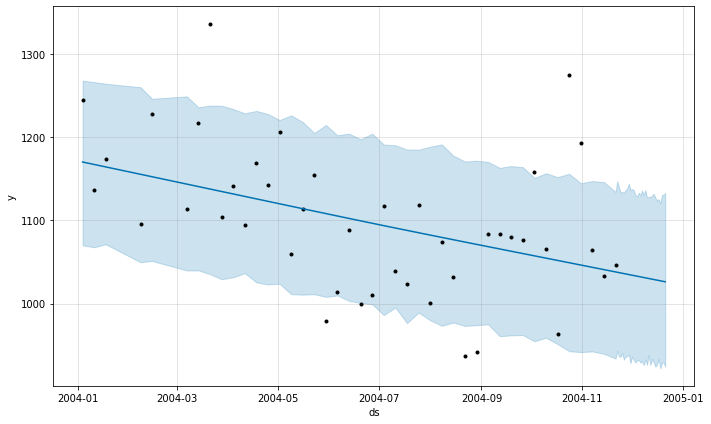

In [41]:
p.plot(forecast)

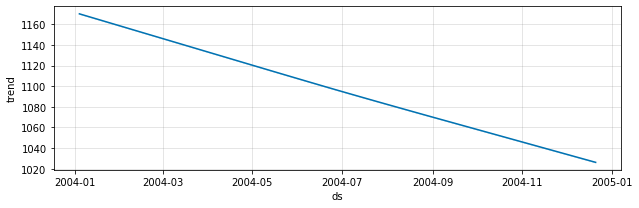

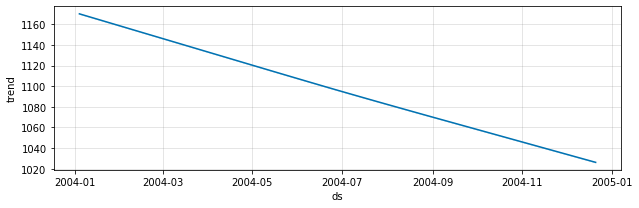

In [42]:
p.plot_components(forecast)

In [43]:
def comparison_dataframe(historical,forecast):
    return forecast.set_index('ds')[['yhat','yhat_lower','yhat_upper']].join(historical.set_index('ds'))

In [44]:
cmp_df = comparison_dataframe(df,forecast)

cmp_df.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2004-01-04,1170.048048,1070.004578,1267.769979,1244.380952
2004-01-11,1167.096943,1067.671620,1266.002176,1136.801760
2004-01-18,1164.145837,1071.240408,1263.992038,1173.375000
2004-02-08,1155.292521,1049.700764,1259.904054,1095.033333
2004-02-15,1152.341416,1051.221264,1245.956263,1227.406250


In [48]:
def forecast_errors(df,prediction_size):
    
    df = df.copy()
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e']/df['y'] 
    
    predicted_part = df[-prediction_size:]
    error_mean = lambda error_name : np.mean(np.abs(predicted_part[error_name]))
    
    return{'MAPE': error_mean('p'),'MAE':error_mean('e')}

In [49]:
for error_name,error_value in forecast_errors(cmp_df,prediction_size).items():
    print(error_name,error_value)

MAPE 10.739652607466294
MAE 132.17060616775677


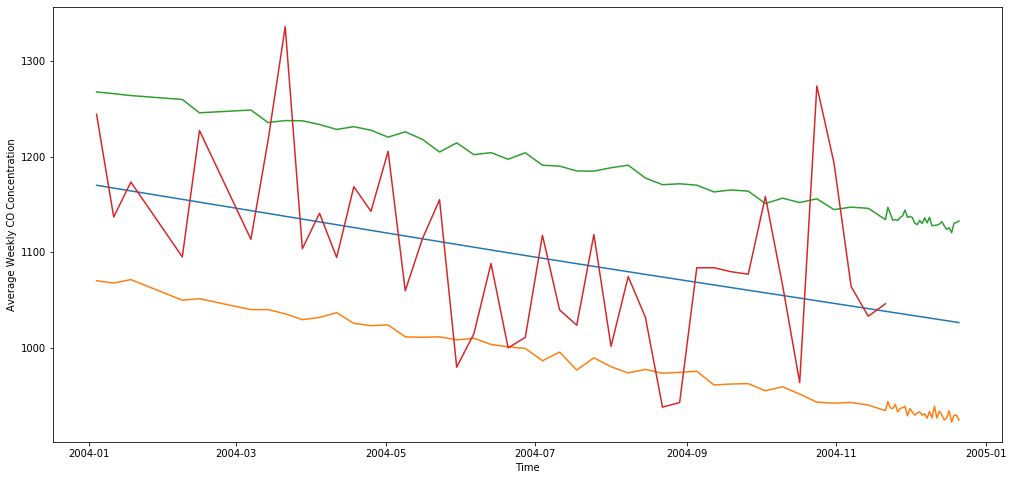

In [51]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df['yhat'])
plt.plot(cmp_df['yhat_lower'])
plt.plot(cmp_df['yhat_upper'])
plt.plot(cmp_df['y'])
plt.xlabel('Time')
plt.ylabel('Average Weekly CO Concentration')
plt.grid(False)
plt.show()